
# Project: Investigate a Dataset (Medical Appolintment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The following project is based on the "Investigate a Dataset" capstone project for the Data Analyst Nanodegree program from Udacity. The chosen project attempts to investigate the reasons why a patient might make a doctoctor's appointment, receives all the necessary information including time and place and chooses not to show for the appointment. There are 14 associated variables (13 independent variables and 1 dependent variable) for the project. The chosen independent variables chosen for investigation are gender, neighbourhood, hipertension, diabetes, alcoholism and handcap. The dependent variabel for the dataset is the no show variable.

The research questions include:
1. What is the proportion of patients who missed their scheduled appointments?
2. Does receiveing an SMS prior to the date of appointment affect whether the patient will show up or not?
3. Is there a gender disparity between the patients who show up and those who do not?

In [2]:
# importing required packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Inorder for us to analyse the dataset, pandas is required hence the import. Numpy offers a number of comprehensive mathematical functions hat are required for statistics. Finally, we need matplotlib to make our visuals more appealing and descriptive.

<a id='wrangling'></a>
## Data Wrangling

The following section of the report involves loading the chosen data and checking for cleanliness of the data. A brief explanation is provided below each stage of the data wrangling process.


### General Properties

In [3]:
# Loading the dataset
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The above code displays the variables to be investigated. We can find out more [about the dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments) to understand the data dictionary or the above variables. From the above code, we can identify a number of issues;
1. There is inconsistency in the naming of variables from the column names table. Inconsistency of variables in two forms;
    1. Columns names with two names are either separated using no spaces and capital letters (eg AppointmentDate) or dashes (eg SMS_received)
    2. According to the data dictionary, columns with boolean data ('yes' or 'no', 'true' or 'false') are represented using the integers 1 and 0. However, the no-show column is inconsistent with these statistical assumptions and therefor needs to be corrected.

2. A typo for the word hypertension is identified.

In [4]:
# Checking for duplicates
sum(df.duplicated())

0

The dataset has zero duplicate values

In [5]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All variables have 110527 rows and 14 columns in accordance to the shape of the dataset. This means that there are no missing values.

The ScheduledDay and AppointmentDay columns are not conisistent even though they both read date and time. We therefore need to change the data types from object to datetime. 

In [6]:
# Basic information of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above table, the first row (count) shows the number of missing values which in this case, as previously established is zero.

We can gather from the mean table that the average age of the participants is 37 years old. The minimum age is observed as -1. This is an error in the dataset as a person cannot have a negative age. We will fix this with our next code. The maximum age of the participants is 115 years.

We need more information on the handicap variable. The minimum value is 0 while the maximum value is 4. According to the information provided [about the dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments), the handicap section can be either true(represented as 1) or false (represented as 0). we will therefore need to investigate this section a bit further in our analysis.

Finally, we can observe from the heading column that the naming of the columns is not consistent. Therefore, for consistency, we will have to rename some of the columns. 

### Data Cleaning

The following section will adress the concerns mentioned and review the dataset to make sure its clean.


- We wil begin by making the column titles more consistent for easier data analysis. We will also be correcting some of the typos in the column titles.

In [8]:
# Correcting the column typos by renaming columns. 
# The rename function is used for this process.
df.rename(columns={'PatientId': 'patient_id','Gender':'sex','AppointmentID': 'appointment_id', 'ScheduledDay':'scheduled_day', 'AppointmentDay':'appointment_day','Neighbourhood':'neighbourhood','Scholarship': 'scholarship', 'Hipertension': 'hypertension', 'Age':'age', 'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 'SMS-received': 'sms_received','No-show':'no_show'}, inplace=True)

#Confirming changes
df.head()

,patient_id,appointment_id,sex,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Next, we will change the format of the data types of the scheduled day and appointment day columns as well as the patient_id column.

In [13]:
# Format changes on data columns.
# We will use the datetime function to complete this process.
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['appointment_day']=pd.to_datetime(df['appointment_day'])

#Confirm changes
df.dtypes

patient_id                     float64
appointment_id                   int64
sex                             object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
SMS_received                     int64
no_show                         object
dtype: object

. From the above table, the patient_id is identified as a float instead of an integer. 

In [14]:
df['patient_id']= df['patient_id'].astype('int64')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   sex              110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  SMS_received     110527 non-null  int64              
 13 

- For our third step in data cleaning, we will look into the age column. We have a minus value in the age counts which does not make sense. We can either drop the entire row or change the minus to positive. 

In [15]:
# We will use the query function to identify the ages that are less than 0
df.query('age < 0')

,patient_id,appointment_id,sex,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# Drop the sepecific row using the drop function
df.drop(df.index[99832], inplace=True)

# Confirm changes
df.describe()


,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above changes, the minimum age is no longer a negative number but 18 years. This is more reasonable.

- In our final step of the data cleaning process, we will convert the no_show column to integers to make it more consistent for statistical analysis.

In [19]:
# Check the number of patients who showed up and those who did not. We will use the groupby function.
df.groupby('no_show')['patient_id'].count()

no_show
No     88207
Yes    22319
Name: patient_id, dtype: int64

In [20]:
# We will use the replace function to achieve the desired results.
df.no_show = df.no_show.replace({'Yes': 1, 'No':0})

# Confirm changes
df.head()

,patient_id,appointment_id,sex,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1. What is the proportion of patients who showed up and those who did not?

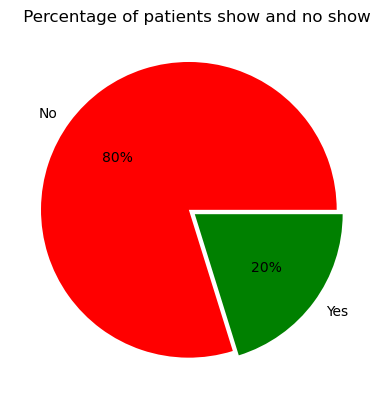

In [10]:
# Patient show up distribution
no_show_labels = ['No','Yes']
colors = ("red", "green")
explode = (0.05, 0)
plt.pie(df['no_show'].value_counts(), explode = explode, labels=no_show_labels, colors = colors, autopct='%1.0f%%')
plt.title(' Percentage of patients show and no show')
plt.show()

From the pie chart above, we notice that the patients who did not show up for their scheduled appointments were more than those who showed up.

### Q2. Is the number of patients who show up and those who did not show up affected by whether they received a text or not?

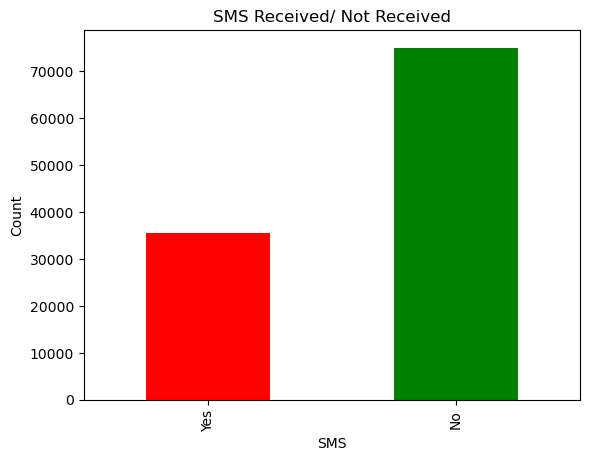

In [11]:
# SMS received distribution
colors = ("red", "green")
df.SMS_received.value_counts().sort_values().plot(kind = 'bar', color =['red', 'green'])
plt.xticks([1, 0], ['No', 'Yes'])
plt.xlabel("SMS")
plt.ylabel("Count")
plt.title("SMS Received/ Not Received");

Most patients did not receive a text or sms to remind them of their appointment. Those who did not receive a text had the highest number of no shows.

### Q3. Which sex/ gender missed the most appointments

In [12]:
# Get the gender values
df.sex.unique()

array(['F', 'M'], dtype=object)

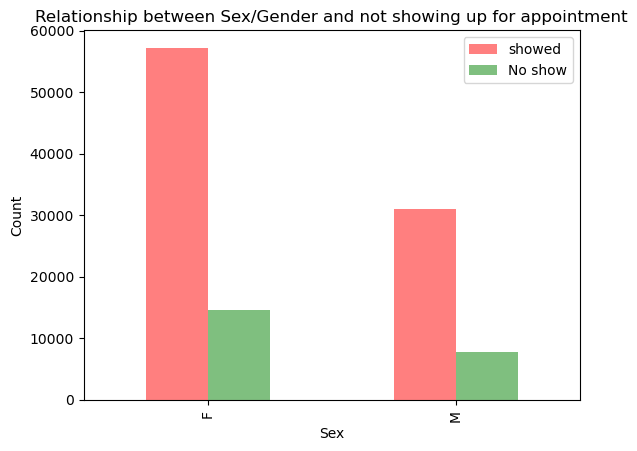

In [13]:
# Bar chart showing the relationship between sex and showing up for appointment.
df.groupby("sex")["no_show"].value_counts().unstack().plot(kind="bar", alpha=0.5, color=['red', 'green'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["showed","No show"]);
plt.title("Relationship between Sex/Gender and not showing up for appointment")
plt.show();

There were are females than males who show up for their appointments. 

<a id='conclusions'></a>
## Conclusions



1. There percentage of patients who did not show for their appointments were more than those who showed up.
2. Those who received an SMS prior to their appointment were more likely to show up for the appointment than those who did not.
3. Females were more likely to show up for their appointments than males.


#### Limitations of the Research


I believe more analysis would have been provided if a follow up message would have been more than one. Therefore, the analysis would have been more accurate if every patient received a message and a follow up message was sent out to some patients. Moreover, there is no data on why an appointment was booked. The reason for the doctor's appointment would have provided further information on why patients would miss the appointments. 

## References

https://github.com/SimTheGreat/udacity-data-analyst-nd/blob/master/p2-Investigate%20a%20Dataset-no-show-data-analysis-master/Untitled.ipynb

https://www.kaggle.com/datasets/joniarroba/noshowappointments

https://www.youtube.com/watch?v=0P7QnIQDBJY&t=857s&ab_channel=KeithGalli